# Principal Component Analysis Project

In this project, please apply PCA to the iris dataset and then create a model to classify the target. Compare with the result when no PCA is applied.

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [3]:
from sklearn import datasets

iris = datasets.load_iris()

df = iris.data
col = iris.target
names = iris.feature_names

## EDA

In [5]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df_target = pd.DataFrame(iris["target"], columns = ["target_names"])
df_target.value_counts()

target_names
0               50
1               50
2               50
Name: count, dtype: int64

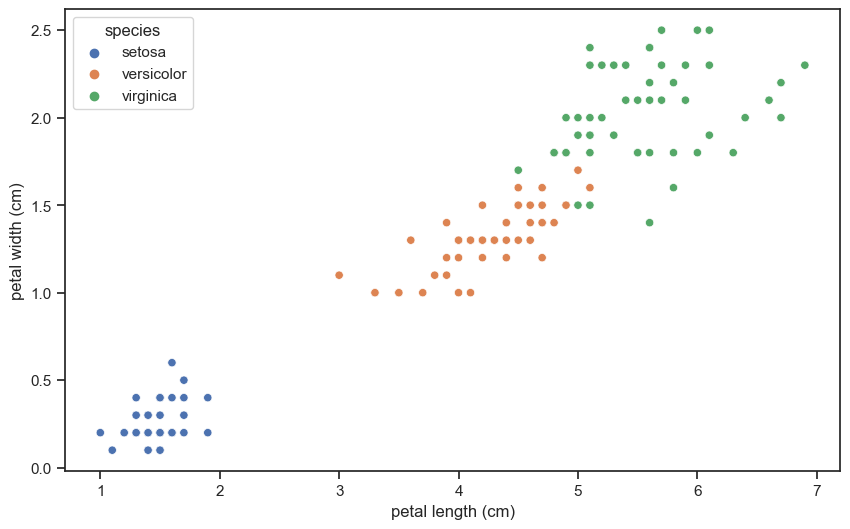

In [8]:
# The Two Petal Features, Length and Width
plt.figure(figsize=(10, 6))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species', data=iris_df)
plt.show()

##### Note: Iris virginica and Iris versicolor clusters blend together a bit, and are not linearly separable

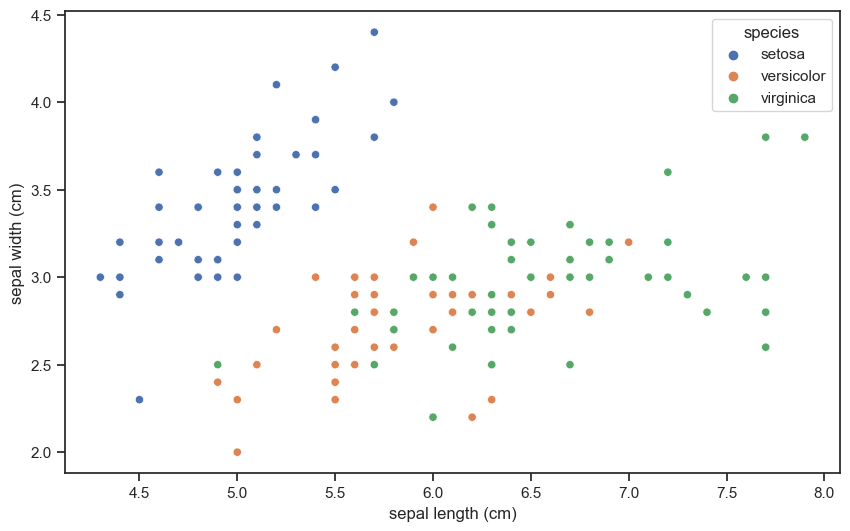

In [10]:
# The Two Sepal Features, Length and Width
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=iris_df)
plt.show()

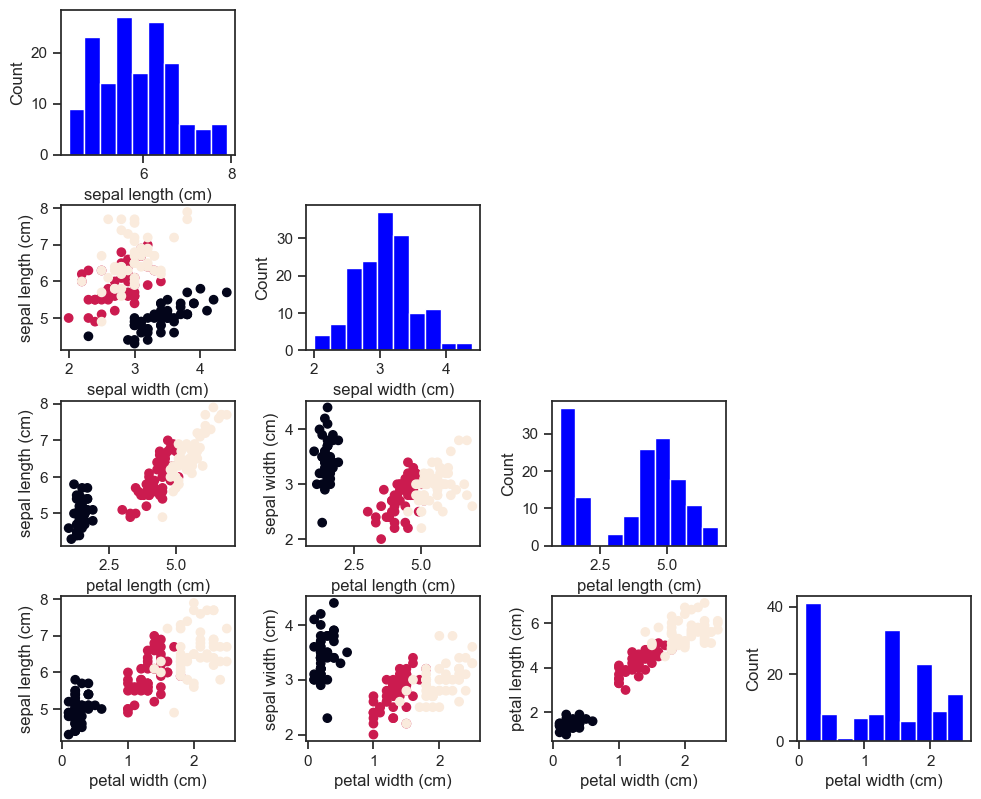

In [11]:
# how all features are related

n_samples, n_features = df.shape
fig, ax = plt.subplots(nrows=n_features, ncols=n_features, figsize= (10, 8))
fig.tight_layout()

for i, j in zip(*np.triu_indices_from(ax, k=1)):
    ax[j, i].scatter(df[:, j], df[:, i], c = col)
    ax[j, i].set_xlabel(names[j])
    ax[j, i].set_ylabel(names[i])
    ax[i, j].set_axis_off()

for i in range(n_features):
    ax[i, i].hist(df[:, i], color = 'blue')
    ax[i, i].set_ylabel('Count')
    ax[i, i].set_xlabel(names[i])

## Interpreting the components

In [13]:
# standard scaler
iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:, :-1])
iris_scaled_df = pd.DataFrame(data=iris_scaled, columns=names)
iris_scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


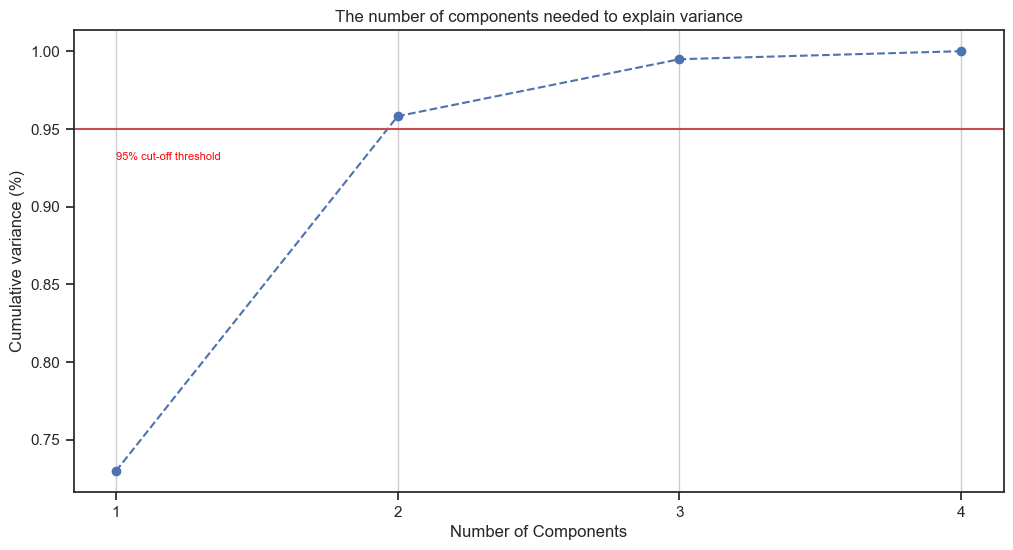

In [14]:
thres = 0.95
pca2 = PCA().fit(iris_scaled)

fig, ax = plt.subplots(figsize=(12,6))
xi = range(1, iris_scaled.shape[1]+1)
y = np.cumsum(pca2.explained_variance_ratio_)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(xi)
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=thres, color='r', linestyle='-')
plt.text(1, 0.93, '95% cut-off threshold', color = 'red', fontsize=8)

ax.grid(axis='x')
plt.show()

In [15]:
var_ratio = np.cumsum(pca2.explained_variance_ratio_)
min_comp = np.where(var_ratio >= thres)[0][0]
min_comp

1

In [16]:
var_ratio[min_comp]

0.9581320720000164

In [17]:
# Another way to choose components
cov_mat = np.cov(df.T)
eigen_vals, eigen_vecs = np.linalg.eigh(cov_mat)

total = sum(eigen_vals)
variance = [(i/total)*100 for i in sorted(eigen_vals, reverse=True)]
packed = pd.DataFrame(variance, columns=['Percent of Data Packed in each PCA'], index=['PCA1','PCA2','PCA3','PCA4'])
packed.head()

,Percent of Data Packed in each PCA
PCA1,92.461872
PCA2,5.306648
PCA3,1.710261
PCA4,0.521218


Reference: https://medium.com/@betulmesci/dimensionality-reduction-with-principal-component-analysis-and-linear-discriminant-analysis-on-iris-dc1731c07fad

Conclusion: 1 or 2 components would be representative enough. 2 components captures 97.76% of the total veriation

???? Cho nay em khong hieu lam, theo nhu bang ben duoi thi voi 1PC thi se capture duoc 92.46% nhung ma the code chi huong dan thi no lai ra 95.81%???
HELP PLS.

## Distribution after PCA (n=2)

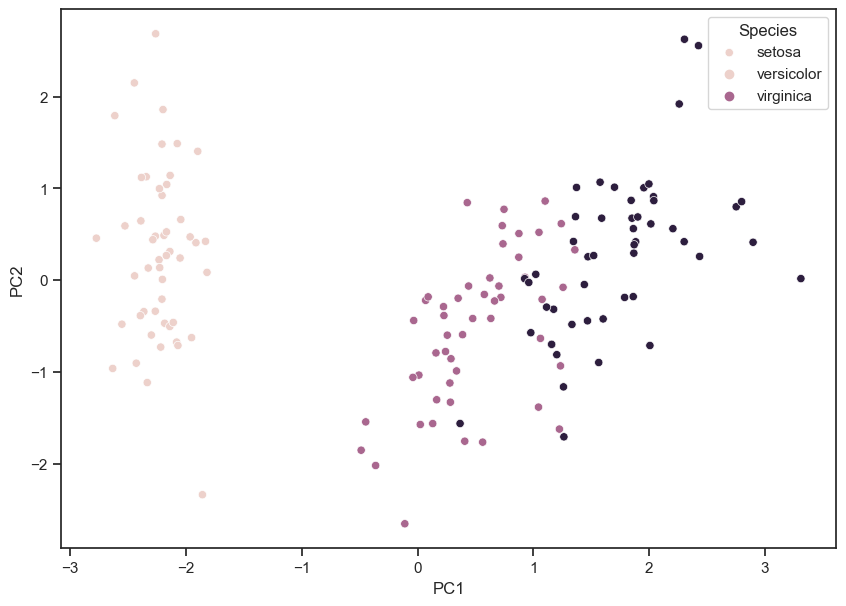

In [22]:
pca = PCA(n_components=2)
pca2 = pca.fit_transform(iris_scaled)

pca2_df = pd.DataFrame(data=pca2, columns=['PC1', 'PC2'])
pca2_df['species'] = iris.target

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=pca2_df)
plt.legend(title='Species', labels=iris.target_names)
plt.show()

## Compare with no PCA

In [24]:
# Copy here to remember
df = iris.data
col = iris.target
names = iris.feature_names
target_names = iris.target_names

In [25]:
from sklearn.svm import SVC

# Standardize
X_train, X_test, y_train, y_test = train_test_split(df, col, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Without PCA (for comparison)
classifier_no_pca = SVC(kernel='linear', random_state=42)
classifier_no_pca.fit(X_train_scaled, y_train)
y_pred_no_pca = classifier_no_pca.predict(X_test_scaled)
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
print('WITHOUT PCA:')
print(classification_report(y_test, y_pred_no_pca, target_names=target_names))
print('\n')

# WITH PCA 
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
classifier_pca = SVC(kernel='linear', random_state=42)
classifier_pca.fit(X_train_pca, y_train)
y_pred_pca = classifier_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print('WITH PCA:')
print(classification_report(y_test, y_pred_pca, target_names=target_names))


WITHOUT PCA:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



WITH PCA:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.88      0.78      0.82         9
   virginica       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In this case option,without PCA show higher accuracy

## Play arround with different components (n = 1 and 3)

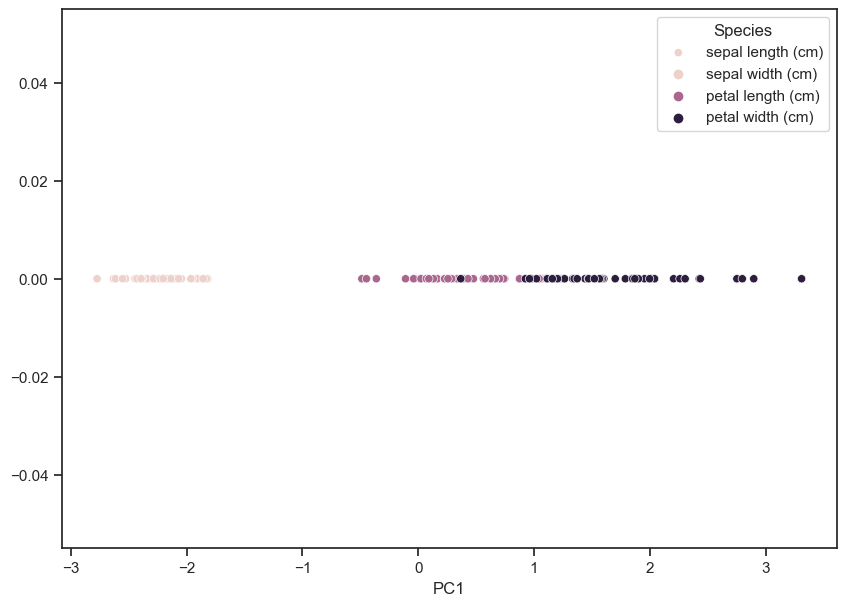

In [28]:
# PCA, n = 1
pcasolo = PCA(n_components = 1)
pca1 = pcasolo.fit_transform(iris_scaled)

pca1_df = pd.DataFrame(data=pca1, columns=['PC1'])
pca1_df['species'] = iris.target

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y=0, hue='species', data=pca1_df)
plt.legend(title='Species', labels=names)
plt.show()

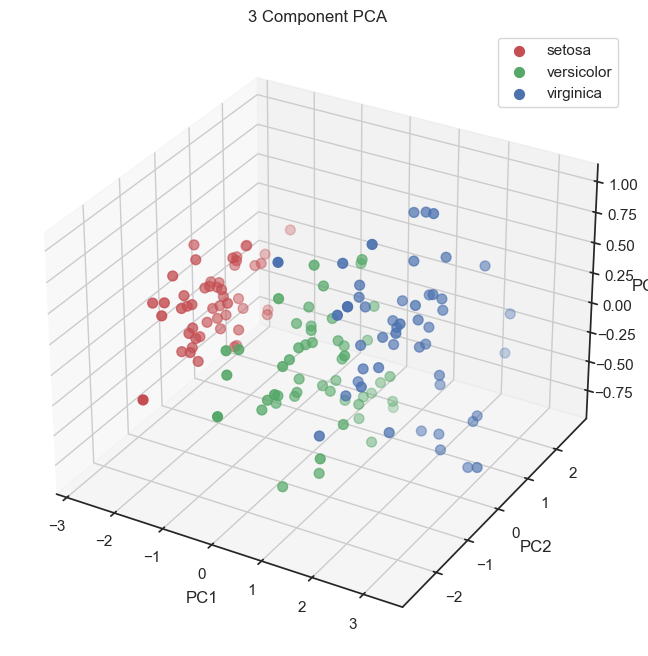

In [29]:
# PCA, n = 3
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca3 = pca.fit_transform(iris_scaled)

pca3_df = pd.DataFrame(data=pca3, columns=['PC1', 'PC2', 'PC3'])
pca3_df['species'] = iris.target

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3 Component PCA')

colors = ['r', 'g', 'b']
for target, color in zip(iris.target_names, colors):
    id = iris.target == list(iris.target_names).index(target)
    ax.scatter(pca3_df.loc[id, 'PC1'],
               pca3_df.loc[id, 'PC2'],
               pca3_df.loc[id, 'PC3'],
               c=color, s=50)

ax.legend(iris.target_names)
ax.grid()

plt.show()